In [1]:
import sympy as sp
import numpy as np


In [2]:
Omega = sp.symbols('Omega', real=True)
Delta_Omega_1 = sp.symbols('\Delta{\Omega}_1', real=True)
Delta_Omega_2 = sp.symbols('\Delta{\Omega}_2', real=True)
kappa = sp.symbols('kappa', real=True)
T = sp.symbols('T', real=True)
I = sp.I


In [3]:
Delta = sp.Symbol('\Delta', real=True)
Omega = sp.Symbol('\Omega', real=True)

new_var = Delta * Omega
print(str(Delta))


\Delta


# 2-Level system Rabi 2 order pertubation

In [4]:
L_Omega_1 = sp.Matrix([ [0,                     I*Delta_Omega_1/2,     -I*Delta_Omega_2/2,      0                   ],
                        [I*Delta_Omega_1/2,    0,                      0,                      -I*Delta_Omega_2/2   ], 
                        [-I*Delta_Omega_2/2,             0,                      0,              I*Delta_Omega_1/2  ],
                        [0,                     -I*Delta_Omega_2/2,      I*Delta_Omega_1/2,     0                   ]])

L_Omega_0 = sp.Matrix([ [0,            I*Omega/2,     -I*Omega/2,      kappa           ],
                        [I*Omega/2,   -kappa/2,       0,              -I*Omega/2       ], 
                        [-I*Omega/2,    0,              -kappa/2,       I*Omega/2      ],
                        [0,            -I*Omega/2,      I*Omega/2,     -kappa          ]])

R_0, D_0 = L_Omega_0.diagonalize()

V_0, _ = (L_Omega_0.T).diagonalize()
V_0 = V_0.T


print('R_0')
display(R_0)
print('V_0')
display(V_0)

lambda_n_0 = D_0.diagonal()


def normalize(V, R):
    M_R = sp.Matrix([[]])
    M_V = sp.Matrix([[]])
    for i in range(R.shape[1]):
        norm_factor = (R.col(i)[0] + R.col(i)[3])
        if norm_factor == 0:
            norm_factor = 1
        M_R = M_R.col_insert(i, R.col(i) / norm_factor)

    
    norm_factor = V * M_R
    for i in range(V.shape[0]):
        M_V = M_V.row_insert(i, V.row(i) / norm_factor.row(i)[i])
    

    return M_V, M_R

V_0, R_0 = normalize(V_0, R_0)
print('R_0 normalized')
display(R_0)
print('V_0 normalized')
display(V_0)
display(lambda_n_0)

def first_order_pertubation_eigenval_correction(V_0, L_Omega_1, R_0, n=None):
    eigenvals = []
    if n == None:
        for i in range(R_0.shape[1]):
            correction = V_0.row(i) * L_Omega_1 * R_0.col(i)
            
            eigenvals.append(correction[0])
    else:
        correction = V_0.row(n) * L_Omega_1 * R_0.col(n)
            
        eigenvals.append(correction[0])

    eigenvals = sp.Matrix(eigenvals)
    return eigenvals

lambda_n_1 = first_order_pertubation_eigenval_correction(V_0, L_Omega_1, R_0, n=0)

print('First order pertubation correction')
display(lambda_n_1)


def second_order_pertubation_eigenval_correction(V_0, L_Omega_1, R_0, n=None):
    eigenvals = []
    if n == None:
        for i in range(R_0.shape[1]):
            correction = 0
            for j in range(R_0.shape[1]):
                if i != j:
                    correction += (V_0.row(i) * L_Omega_1 * R_0.col(j) * V_0.row(j) * L_Omega_1 * R_0.col(i) / (lambda_n_0[i] - lambda_n_0[j]))[0]
            
            eigenvals.append(correction)
    else:
        correction = 0
        for j in range(R_0.shape[1]):
            if n != j:
                correction += (V_0.row(n) * L_Omega_1 * R_0.col(j) * V_0.row(j) * L_Omega_1 * R_0.col(n) / (lambda_n_0[n] - lambda_n_0[j]))[0]
            
        eigenvals.append(correction)
    eigenvals = sp.Matrix(eigenvals)
    return eigenvals

def second_order_pertubation_eigenval_correction(V_0, L_diff, R_0, lambda_n_0, n=None):
    eigenvals = []
    if n == None:
        for i in range(R_0.shape[1]):
            correction = 0
            for j in range(R_0.shape[1]):
                if i != j:
                    correction += (V_0.row(i) * L_diff * R_0.col(j) * V_0.row(j) * L_diff * R_0.col(i) / (lambda_n_0[i] - lambda_n_0[j]))[0]
            
            eigenvals.append(correction)
    else:
        correction = 0
        for j in range(R_0.shape[1]):
            
            if n != j:
                
                #display((V_0.row(n) * L_diff * R_0.col(j) * V_0.row(j) * L_diff * R_0.col(n) / (lambda_n_0[n] - lambda_n_0[j]))[0])
                correction += ((V_0.row(n) * L_diff * R_0.col(j)) * (V_0.row(j) * L_diff * R_0.col(n)) / (lambda_n_0[n] - lambda_n_0[j]))[0]
            
        eigenvals.append(correction)
    eigenvals = sp.Matrix(eigenvals)
    return eigenvals

lambda_n_2 = second_order_pertubation_eigenval_correction(V_0, L_Omega_1, R_0, lambda_n_0, n=0)
lambda_n_2 = sp.simplify(lambda_n_2)




lambda_s = lambda_n_1 + lambda_n_2
#print('Second order pertubation correction')
#display(sp.simplify(lambda_n_2))

def Calculate_quantum_fisher_information(lambda_s):
    
    lambda_s_dif = sp.diff(lambda_s, Delta_Omega_1)
    lambda_s_dif_dif = sp.diff(lambda_s_dif, Delta_Omega_2)
    #display(lambda_s_dif_dif)
    lambda_s_dif_dif = lambda_s_dif_dif.subs(Delta_Omega_1, 0)
    lambda_s_dif_dif = lambda_s_dif_dif.subs(Delta_Omega_2, 0)
    QFI = 4 * T * sp.simplify(lambda_s_dif_dif)

    return QFI

QFI = Calculate_quantum_fisher_information(lambda_n_2)
print('Quantum Fisher Information')
display(QFI)



R_0


Matrix([
[1 + kappa**2/\Omega**2, 0,                                                     -1,                                                     -1],
[        I*kappa/\Omega, 1,  I*(kappa - sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega),  I*(kappa + sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega)],
[       -I*kappa/\Omega, 1, I*(-kappa + sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega), I*(-kappa - sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega)],
[                     1, 0,                                                      1,                                                      1]])

V_0


Matrix([
[                                                                                            1,                                                                                                                                                        0,                                                                                                                                                         0, 1],
[                                                                                            0,                                                                                                                                                        1,                                                                                                                                                         1, 0],
[(-2*\Omega**2 + kappa**2 - kappa*sqrt(-16*\Omega**2 + kappa**2))/(2*(\Omega**2 + 3*kappa**2)), I*(kappa*(2*\Omega**2 + kappa**2) - (\Omega**2 + kappa**2)*(3*kappa + sqrt(-(

R_0 normalized


Matrix([
[(1 + kappa**2/\Omega**2)/(2 + kappa**2/\Omega**2), 0,                                                     -1,                                                     -1],
[        I*kappa/(\Omega*(2 + kappa**2/\Omega**2)), 1,  I*(kappa - sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega),  I*(kappa + sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega)],
[       -I*kappa/(\Omega*(2 + kappa**2/\Omega**2)), 1, I*(-kappa + sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega), I*(-kappa - sqrt(-16*\Omega**2 + kappa**2))/(4*\Omega)],
[                       1/(2 + kappa**2/\Omega**2), 0,                                                      1,                                                      1]])

V_0 normalized


Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1/((1 + kappa**2/\Omega**2)/(2 + kappa**2/\Omega**2) + 1/(2 + kappa**2/\Omega**2)),                                                                                                                                                                                                                                                                                                                                                                                                            

Matrix([[0, -kappa/2, -3*kappa/4 - sqrt(-(4*\Omega - kappa)*(4*\Omega + kappa))/4, -3*kappa/4 + sqrt(-(4*\Omega - kappa)*(4*\Omega + kappa))/4]])

First order pertubation correction


Matrix([[0]])

Quantum Fisher Information


Matrix([[4*T/kappa]])

# Full Stack calculation

The Idear here is that one inputs the hamilton and the decay oporators and the sensing variables, and gets a 2nd order estiamte of the QFI
for this to work, here is some psudo code

1. Make L matrix from Hamilton and decay oporators
2. Find eigenvectors and choose the steady state eigenval and vector
3. Make L_delta matrixes 
4. Calculate corrections to steadystate eigenvalue
5. Calculate QFI from the seatdystate eigenvalue correection

In [ ]:
from sympy.physics.quantum import TensorProduct, Dagger

def T_product(A, B):
    return TensorProduct(A, B.T)

def vec_ing(H_left, H_rigth, c_left, c_rigth):
    
    N_dim = sp.shape(H_left)[0]
    I_n = sp.eye(N_dim)
    c_number = np.shape(c_left)[0]
    c_vec = []
    H_vec = -I * (T_product(H_left, I_n) - T_product(I_n, H_rigth))
    for i in range(c_number):
        c_vec.append(T_product(c_left[i], Dagger(c_rigth[i])) - 1/2 * (T_product(Dagger(c_left[i]) * c_left[i], I_n) + T_product(I_n, Dagger(c_rigth[i]) * c_rigth[i])))
    return H_vec, c_vec

def create_L_matrix(H_vec, c_vec):
    N_dim = sp.shape(H_vec)[0]
    c_number = np.shape(c_vec)[0]
    L = H_vec
    for i in range(c_number):
        L += c_vec[i]
    return L

def gennerate_L(H_left, H_rigth, c_left, c_rigth):
    H_vec, c_vec = vec_ing(H_left, H_rigth, c_left, c_rigth)
    L = create_L_matrix(H_vec, c_vec)
    return L


def gennerate_L_diff(H_left, H_left_diff, H_rigth, H_rigth_diff, c_left, c_left_diff, c_rigth, c_rigth_diff):
    L_diff = 0
    return L_diff


def make_new_var(var, left=True):
    if left:
        new_var = sp.Symbol('\Delta' + '{' + str(var) + '}' + '_1', positive=True)
    else:
        new_var = sp.Symbol('\Delta' + '{' + str(var) + '}' + '_2', positive=True)
    return new_var

def make_new_var_list(var):
    new_var_list = []
    for i in range(len(var)):
        var_list = []
        var_list.append(make_new_var(var[i], left=True))
        var_list.append(make_new_var(var[i], left=False))
        new_var_list.append(var_list)

    return new_var_list

def normalize(V, R):  ######################################### this is the special case for 2 level system
                M_R = sp.Matrix([[]])
                M_V = sp.Matrix([[]])

                for i in range(R.shape[1]):
                    norm_factor = (R.col(i)[0] + R.col(i)[3])
                    if norm_factor == 0:
                        norm_factor = 1
                    M_R = M_R.col_insert(i, R.col(i) / norm_factor)

                
                norm_factor = V * M_R
                for i in range(V.shape[0]):
                    M_V = M_V.row_insert(i, V.row(i) / norm_factor.row(i)[i])
                

                return M_V, M_R


def first_order_pertubation_eigenval_correction(V_0, L_diff, R_0, n=None):
    eigenvals = []
    if n == None:
        for i in range(R_0.shape[1]):
            correction = V_0.row(i) * L_diff * R_0.col(i)
            
            eigenvals.append(correction[0])
    else:
        correction = V_0.row(n) * L_diff * R_0.col(n)
            
        eigenvals.append(correction[0])

    eigenvals = sp.Matrix(eigenvals)
    return eigenvals


def second_order_pertubation_eigenval_correction(V_0, L_diff, R_0, lambda_n_0, n=None):
    eigenvals = []
    if n == None:
        for i in range(R_0.shape[1]):
            correction = 0
            for j in range(R_0.shape[1]):
                if i != j:
                    correction += (V_0.row(i) * L_diff * R_0.col(j) * V_0.row(j) * L_diff * R_0.col(i) / (lambda_n_0[i] - lambda_n_0[j]))[0]
            
            eigenvals.append(correction)
    else:
        correction = 0
        for j in range(R_0.shape[1]):
            
            if n != j:
                
                #display((V_0.row(n) * L_diff * R_0.col(j) * V_0.row(j) * L_diff * R_0.col(n) / (lambda_n_0[n] - lambda_n_0[j]))[0])
                correction += ((V_0.row(n) * L_diff * R_0.col(j)) * (V_0.row(j) * L_diff * R_0.col(n)) / (lambda_n_0[n] - lambda_n_0[j]))[0]
            
        eigenvals.append(correction)
    eigenvals = sp.Matrix(eigenvals)
    return eigenvals


def Calculate_quantum_fisher_information(lambda_s, var_left, var_rigth):
    
    
    lambda_s_dif = sp.diff(lambda_s, var_left)
   
    
    lambda_s_dif_dif = sp.diff(lambda_s_dif, var_rigth)
    

    lambda_s_dif_dif = lambda_s_dif_dif.subs(var_left, 0)
    
    lambda_s_dif_dif = lambda_s_dif_dif.subs(var_rigth, 0)
    
    QFI = 4 * T * lambda_s_dif_dif
    QFI = sp.simplify(QFI)
    
    
    return QFI



def Calculate_quantum_fisher_information_matrix_pertubation(H, c, var):
    """H must be a Hamiltonian matrix with sympy, and c numpy array with the collapse operators with sympy, and var is a numpy array with sympy symbols for the sensing perameters"""
    from sympy.physics.quantum import TensorProduct, Dagger
    from sympy import I
    T = sp.symbols('T', positive=True)
    L = gennerate_L(H, H, c, c)

    L = L.conjugate()
    
    display(L)
    

    N_dim = len(var)
    c_number = len(c)

    QFI = sp.zeros(N_dim, N_dim)

    new_var_list = make_new_var_list(var)
    
    

    R_0, D_0 = L.diagonalize()

    V_0, _ = (L.T).diagonalize()
    V_0 = V_0.T

    #print('R_0')
    #display(R_0)
    #print('V_0')
    #display(V_0)


    lambda_n_0 = D_0.diagonal()
    #V_0, R_0 = normalize(V_0, R_0)

    print('R_0 normalized')
    display(R_0.col(0))
    print('V_0 normalized')
    display(V_0.row(0))

    #print('R_0 normalized')
    #display(sp.simplify(R_0))
    #print('V_0 normalized')
    #display(V_0)


    for i in range(N_dim):
        sym_left = sp.Symbol('\Delta' + '{' + str(var[i]) + '}' + '_1', positive=True)
        
        
        H_left = H * 1
        c_left = c * 1
        
        for k in range(N_dim):
            if i != k:
                H_left = H_left.subs(var[k], 0)
                for n in range(c_number):
                    c_left[n] = c_left[n].subs(var[k], 0)
            else:
                H_left = H_left.subs(var[k], sym_left)
                for n in range(c_number):
                    c_left[n] = c_left[n].subs(var[k], sym_left)

        #for n in range(c_number):
        #    c_left[n] = c_left[n].subs(var[n], 0)
        
        
        




        for j in range(N_dim):
            
            sym_rigth = sp.Symbol('\Delta' + '{' + str(var[j]) + '}' + '_2', positive=True)
            H_rigth = H * 1
            c_rigth = c * 1
            for l in range(N_dim):
                if j != l:
                    H_rigth = H_rigth.subs(var[l], 0)
                    for n in range(c_number):
                        c_rigth[n] = c_rigth[n].subs(var[l], 0)
                else:
                    H_rigth = H_rigth.subs(var[l], sym_rigth)
                    for n in range(c_number):
                        c_rigth[n] = c_rigth[n].subs(var[l], sym_rigth)
            
            #for n in range(c_number):
            #    c_rigth[n] = c_rigth[n].subs(var[n], 0)

            
            
            
            L_diff = gennerate_L(H_left, H_rigth, c_left, c_rigth)

            
            
            
            

            

            #print('lambda_n_0')
            #display(lambda_n_0)
            
            lambda_n_1 = first_order_pertubation_eigenval_correction(V_0, L_diff, R_0, n=0)
            
            
            

            lambda_n_2 = second_order_pertubation_eigenval_correction(V_0, L_diff, R_0, lambda_n_0, n=0)
            
            #lambda_n_2 = sp.simplify(lambda_n_2)
            
            
            #lambda_n_2 = sp.simplify(lambda_n_2)

            lambda_s = lambda_n_1 + lambda_n_2

            

            
            
            


            

            QFI[i, j] = Calculate_quantum_fisher_information(lambda_s, sym_left, sym_rigth)

            
    
    return QFI
            
 

def Calculate_quantum_fisher_information_matrix_pertubation_HF(H, c, var): #Hellman-Feynman theorem

    from sympy import I
    T = sp.symbols('T', positive=True)
    L = gennerate_L(H, H, c, c)

    print('R_0 eigenvector')
    display(L.eigenvects())
    #print('V_0 eigenvector')
    #display(V_0)
    
    

    size = sp.shape(L)[0]
    N_dim = len(var)
    c_number = len(c)

    QFI = sp.zeros(N_dim, N_dim)

    lambda_n_0 = 0

    zero_vector = sp.zeros(size + 1, 1)
    R_0 = sp.zeros(size, 1)
    V_0 = sp.zeros(1, size)
    var_list_R = []
    var_list_L = []
    equations_R = []
    equations_L = []
    for i in range(size):
        var_list_R.append(sp.Symbol('var_R' + str(i)))
        R_0[i] = var_list_R[i]
        var_list_L.append(sp.Symbol('var_L' + str(i)))
        V_0[i] = var_list_L[i]

    

    for i in range(size):
        equations_R.append(0)
        equations_L.append(0)
        for j in range(size):
            equations_R[i] += L[i, j] * R_0[j]
            equations_L[i] += V_0[j] * L[i, j]

        
    ## Add normelasation condition
    equations_R.append(-1)
    for i in range(int(np.sqrt(size))):
        equations_R[-1] += R_0[i * (int(np.sqrt(size)) + 1)] 


    R_s_m = sp.zeros(size, 1)
    R_dict = sp.solve(equations_R, var_list_R, dict=True)[0]
    R_dict_keys = list(R_dict.keys())

    for i in range(size):
        R_s_m[i] = R_dict[R_dict_keys[i]]
    



    equations_L.append(-1)
    for i in range(size):
        equations_L[-1] += V_0[i] * R_s_m[i]

    V_s_m = sp.zeros(1, size)
    V_dict = sp.solve(equations_L, var_list_L, dict=True)[0]
    V_dict_keys = list(V_dict.keys())

    for i in range(size):
        V_s_m[i] = V_dict[V_dict_keys[i]]

    
    


    for i in range(N_dim):
        sym_left = sp.Symbol('\Delta' + '{' + str(var[i]) + '}' + '_1', positive=True)
        
        
        H_left = H * 1
        c_left = c * 1
        

        for k in range(N_dim):
            if i != k:
                H_left = H_left.subs(var[k], 0)
                for n in range(c_number):
                    c_left[n] = c_left[n].subs(var[k], 0)
            else:
                H_left = H_left.subs(var[k], sym_left)
                for n in range(c_number):
                    c_left[n] = c_left[n].subs(var[k], sym_left)

        #for n in range(c_number):
        #    c_left[n] = c_left[n].subs(var[n], 0)
        
        
        




        for j in range(N_dim):
            
            sym_rigth = sp.Symbol('\Delta' + '{' + str(var[j]) + '}' + '_2', positive=True)
            H_rigth = H * 1
            c_rigth = c * 1
            for l in range(N_dim):
                if j != l:
                    H_rigth = H_rigth.subs(var[l], 0)
                    for n in range(c_number):
                        c_rigth[n] = c_rigth[n].subs(var[l], 0)
                else:
                    H_rigth = H_rigth.subs(var[l], sym_rigth)
                    for n in range(c_number):
                        c_rigth[n] = c_rigth[n].subs(var[l], sym_rigth)
            
            #for n in range(c_number):
            #    c_rigth[n] = c_rigth[n].subs(var[n], 0)

            
            
            
            L_VR = gennerate_L(H_left, H_rigth, c_left, c_rigth)
            print('L_VR')
            display(L_VR)
            R_VR, D_VR = L_VR.diagonalize()
            print('R_VR')
            display(R_VR)

            L_diff = gennerate_L_diff()
            print('L_diff')
            display(L_diff)
            R_0, D_0 = L_diff.diagonalize()
            display(R_0)
            

            lambda_diff = V_s_m * L_diff * R_s_m
            print('lambda_diff')
            display(lambda_diff)
            lambda_diff_diff = sp.diff(lambda_diff, sym_rigth)
            lambda_diff_diff = lambda_diff_diff.subs(sym_left, var[i])
            lambda_diff_diff = lambda_diff_diff.subs(sym_rigth, var[j])


            QFI_ij = 4 * T * lambda_diff_diff
            QFI_ij = sp.simplify(QFI_ij)
            QFI[i, j] = QFI_ij

    return QFI
    

    


 




In [6]:
Omega = sp.Symbol('\Omega', real=True)
gamma = sp.Symbol('\gamma', real=True, positive=True)
T = sp.Symbol('T', real=True, positive=True)

Delta = sp.Symbol('\Delta', real=True)

sigma_x = sp.Matrix([[0, 1/2], [1/2, 0]])
sigma_m = sp.Matrix([[0, 1/2], [0, 0]])

sigma_ee = sp.Matrix([[0, 0], [0, 1]])


H = Omega * sigma_x #+ Delta * sigma_ee
c = [gamma * 2 * sigma_m]


#display(c[0])

#display(Dagger(c[0]))

#display(TensorProduct((c[0]), Dagger(c[0])))

var = [Omega, gamma]

QFI_HF = Calculate_quantum_fisher_information_matrix_pertubation_HF(H, c, var)

#QFI = Calculate_quantum_fisher_information_matrix_pertubation(H, c, var)


print('Quantum Fisher Information') 
display(QFI_HF)

R_0 eigenvector


Matrix([
[var_R0],
[var_R1],
[var_R2],
[var_R3]])

V_0 eigenvector


Matrix([[var_L0, var_L1, var_L2, var_L3]])

L_VR


Matrix([
[                      0,  0.5*I*\Delta{\Omega}_2, -0.5*I*\Delta{\Omega}_1,                       0],
[ 0.5*I*\Delta{\Omega}_2,                       0,                       0, -0.5*I*\Delta{\Omega}_1],
[-0.5*I*\Delta{\Omega}_1,                       0,                       0,  0.5*I*\Delta{\Omega}_2],
[                      0, -0.5*I*\Delta{\Omega}_1,  0.5*I*\Delta{\Omega}_2,                       0]])

R_VR


Matrix([
[-1.0, 1.0,  1.0, -1.0],
[ 1.0, 1.0, -1.0, -1.0],
[-1.0, 1.0, -1.0,  1.0],
[ 1.0, 1.0,  1.0,  1.0]])

TypeError: gennerate_L_diff() missing 8 required positional arguments: 'H_left', 'H_left_diff', 'H_rigth', 'H_rigth_diff', 'c_left', 'c_left_diff', 'c_rigth', and 'c_rigth_diff'

In [7]:
A = sp.Matrix([[3, 0], [1, 3]])

display(A.row(0)[0])


kappa = sp.Symbol('\kappa', positive=True)

display(sp.sqrt(kappa) * sp.conjugate(sp.sqrt(kappa)))



3

\kappa

Matrix([
[            0,          0.5*I*\Omega,          -0.5*I*\Omega,    1.0*\gamma],
[ 0.5*I*\Omega, I*\Delta - 0.5*\gamma,                      0, -0.5*I*\Omega],
[-0.5*I*\Omega,                     0, -I*\Delta - 0.5*\gamma,  0.5*I*\Omega],
[            0,         -0.5*I*\Omega,           0.5*I*\Omega,   -1.0*\gamma]])

Matrix([
[          0,          -I*\Omega/2,          I*\Omega/2,      \gamma],
[-I*\Omega/2, -I*\Delta - \gamma/2,                   0,  I*\Omega/2],
[ I*\Omega/2,                    0, I*\Delta - \gamma/2, -I*\Omega/2],
[          0,           I*\Omega/2,         -I*\Omega/2,     -\gamma]])

Matrix([
[     0,  1.0*I, -1.0*I,    1.0],
[ 1.0*I,   -0.5,      0, -1.0*I],
[-1.0*I,      0,   -0.5,  1.0*I],
[     0, -1.0*I,  1.0*I,   -1.0]])

Matrix([
[ 0,   -I,    I,  1],
[-I, -1/2,    0,  I],
[ I,    0, -1/2, -I],
[ 0,    I,   -I, -1]])

/tmp/ipykernel_105107/948149531.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rho_sigma_z[i] = sigma_z(rho_list[i])
/tmp/ipykernel_105107/948149531.py:78: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rho_sigma_z_2[i] = sigma_z(rho_list_2[i])
/tmp/ipykernel_105107/948149531.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rho_sigma_x[i] = sigma_x(rho_list[i])
/tmp/ipykernel_105107/948149531.py:80: DeprecationWarning: Conversion of an array with ndim > 0 

Matrix([
[  0, 1.0],
[1.0,   0]])

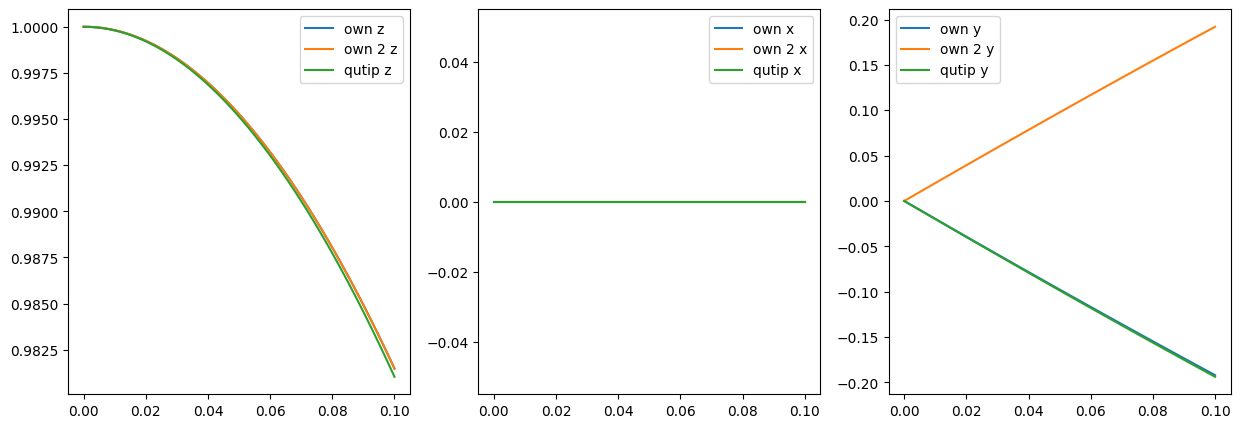

In [8]:
import matplotlib.pyplot as plt
N_t = 100
dt = 0.001

t = np.linspace(0, N_t * dt, N_t)

rabi = 2
dec = 1
detuning = 0

Delta = sp.Symbol('\Delta', real=True)

H_test = H + Delta * sp.Matrix([[0, 0], [0, 1]])

L_rabi = gennerate_L(H_test, H_test, c, c)

display(L_rabi)

L_Omega_0 = sp.Matrix([ [0,            -I*Omega/2,              I*Omega/2,              gamma           ],
                        [-I*Omega/2,   -gamma/2 - I * Delta,    0,                      I*Omega/2       ], 
                        [I*Omega/2,    0,                       -gamma/2 + I * Delta,   -I*Omega/2      ],
                        [0,            I*Omega/2,               -I*Omega/2,             -gamma          ]])

L_rabi_2 = L_Omega_0
display(L_rabi_2)
L_rabi = L_rabi.subs(Omega, rabi)
L_rabi = L_rabi.subs(gamma, dec)
L_rabi = L_rabi.subs(Delta, detuning)

L_rabi_2 = L_rabi_2.subs(Omega, rabi)
L_rabi_2 = L_rabi_2.subs(gamma, dec)
L_rabi_2 = L_rabi_2.subs(Delta, detuning)

display(L_rabi)
display(L_rabi_2)


rho = sp.Matrix([1, 0, 0, 0])
rho_list = [rho]

rho_2 = sp.Matrix([1, 0, 0, 0])
rho_list_2 = [rho_2]

for i in range(N_t - 1):
    rho = rho + dt * L_rabi * rho
    
    norm = (Dagger(rho) * rho)[0]
    rho = rho / norm
    rho_list.append(rho)
    rho_2 = rho_2 + dt * L_rabi_2 * rho_2
    norm = (Dagger(rho_2) * rho_2)[0]
    rho_2 = rho_2 / norm
    rho_list_2.append(rho_2)


rho_list = np.array(rho_list)
rho_list_2 = np.array(rho_list_2)

def sigma_z(rho):
    return rho[0] - rho[3]

def sigma_x(rho):
    return rho[1] + rho[2]

def sigma_y(rho):
    return I * rho[1] - I * rho[2]

rho_sigma_z = np.zeros(N_t)
rho_sigma_x = np.zeros(N_t)
rho_sigma_y = np.zeros(N_t)
rho_sigma_z_2 = np.zeros(N_t)
rho_sigma_x_2 = np.zeros(N_t)
rho_sigma_y_2 = np.zeros(N_t)

for i in range(N_t):

    rho_sigma_z[i] = sigma_z(rho_list[i])
    rho_sigma_z_2[i] = sigma_z(rho_list_2[i])
    rho_sigma_x[i] = sigma_x(rho_list[i])
    rho_sigma_x_2[i] = sigma_x(rho_list_2[i])
    rho_sigma_y[i] = sigma_y(rho_list[i])
    rho_sigma_y_2[i] = sigma_y(rho_list_2[i])


import qutip as qt


H_rabi = H_test.subs(Omega, rabi)
H_rabi = H_rabi.subs(gamma, dec)
H_rabi = H_rabi.subs(Delta, detuning)

c_rabi = c[0].subs(gamma, dec)

display(H_rabi)

H_qt = qt.Qobj(H_rabi)
c_qt = [qt.Qobj(c_rabi)]
rho_qt = qt.Qobj(sp.Matrix([[1, 0], [0, 0]]))


resultat = qt.mesolve(H_qt, rho_qt, t, c_qt, [qt.sigmax(), qt.sigmay(), qt.sigmaz()])



fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].plot(t, rho_sigma_z, label='own z')

ax[0].plot(t, rho_sigma_z_2, label='own 2 z')

ax[1].plot(t, rho_sigma_x, label='own x')

ax[1].plot(t, rho_sigma_x_2, label='own 2 x')

ax[2].plot(t, rho_sigma_y, label='own y')

ax[2].plot(t, rho_sigma_y_2, label='own 2 y')

ax[0].plot(t, resultat.expect[2], label='qutip z')

ax[1].plot(t, resultat.expect[0], label='qutip x')

ax[2].plot(t, resultat.expect[1], label='qutip y')

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()




In [59]:
var_1 = sp.Symbol('var_1', real=True)
var_2 = sp.Symbol('var_2', real=True)


expr = sp.Matrix([var_1 * 3])

expr_dif = sp.diff(expr, var_1)

expr_2 = expr.subs(var_1, var_2)

print(type(expr_2[0]))

expr_dif_2 = sp.diff(expr_2, var_2)

display(expr_dif)
display(expr_dif_2)



M = sp.Matrix([[1, 2], [3, 4]])

M[0, 0] = 0

display(M)




<class 'sympy.core.mul.Mul'>


Matrix([[3]])

Matrix([[3]])

Matrix([
[0, 2],
[3, 4]])